# Hands-on on Lattice Calculation in Python

*D. Gamba, A. Latina, T. Prebibaj, G. Russo*

[CAS 2023 - Introduction to Accelerator Physics](https://indico.cern.ch/event/1226773/) (25 September - 6 October 2023, Santa Susanna, Spain).

<p align="center">
<img src=./_img_exercises/banner.png width="80%">
</p>

## Introduction 

- The *Hands-on Lattice Calculations in Python* course is meant to present you a series of "conceptual" exercises to help understanding the basics of transverse beam dynamics.
As you can guess, these exercises are expected to be solved using *Python*. 

- We will suggest *a possible way* for translating the exercises we propose into Python, but most of the time the result can be achieved using multiple paths and we encourage the student to explore them. 

- **The goal is to stimulate the student's curiosity, so the simple exercise should be challenged to trigger more questions and to dive deeper into the physics of the problem.**

## Is your computer ready?

You received the [instructions](./Setup_Instructions.md) on how to prepare your python working environment.

**QUESTION: is everyone able to launch a jupyter lab server from her/his laptop?** 

**QUESTION: can you import the following packages without errors?** 


In [1]:
# numpy: our main numerical package
import numpy as np
# matplotlib and seaborn: our plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# linear algebra and optimisation algorithms
from numpy.linalg import norm
from scipy.optimize import minimize
# some useful package
from copy import deepcopy

# **Optional:** for animations you might need to configure your jupyter lab properly:
# > pip install ipywidgets
# > jupyter nbextension enable --py widgetsnbextension
# > jupyter labextension install @jupyter-widgets/jupyterlab-manager
from ipywidgets import interactive

### ... some other setup not to be bothered later

Let's also configure `matplotlib` for more presentation-friendly plot production

In [2]:
# some setup for the plotting
from matplotlib import pyplot as plt
%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

---

# Essentials

---

## The Python Basics

lists, dictionaries, and numpy arrays...

In [3]:
# a list of object is defined with [], and element accessed with [idx]
my_list = [1,2,3,4]
print(f"The third element in my list is: {my_list[2]}")

# a list can contain any object, also another list to "fake" multi-dimensional arrays
my_list_of_lists = [[1,2,3,4],[5,6,7,8]]
print(f"A list of lists looks almost like a matrix:\n {my_list_of_lists}")

# a dictionary is defined with {}, and elements are accessed with ['key_value']
my_dictionary = {'a_key': 34, 'another_key': 'value as string', 3: 'value associated to an int key'}
print(f"The value associated to key 'a_key' in 'my_dictionary' is: {my_dictionary['a_key']}")

The third element in my list is: 3
A list of lists looks almost like a matrix:
 [[1, 2, 3, 4], [5, 6, 7, 8]]
The value associated to key 'a_key' in 'my_dictionary' is: 34


In [4]:
# a numpy array can be created from a list of numbers
my_2D_array = np.array(my_list_of_lists)
print(f"np.array is a nicer representation of matrices:\n {my_2D_array}")
print(f"First row, second column value is: {my_2D_array[0,1]}")
# or from a random generator
my_random_2D_array = np.random.randn(2,100)
# and one can do mathematical operations
print(f"means (over the column idx, i.e. dim=1): {np.mean(my_random_2D_array,1)} and std: {np.std(my_random_2D_array,1)}")

np.array is a nicer representation of matrices:
 [[1 2 3 4]
 [5 6 7 8]]
First row, second column value is: 2
means (over the column idx, i.e. dim=1): [ 0.0685796  -0.17298794] and std: [1.10809541 1.00111557]


### Plotting and number generation

- one typically uses matplotlib (`import matplotlib.pyplot as plt`) for plots.
- numpy includes functions to easily generate equally spaced numbers (`np.linspace(...)`) or Gaussian-distributed (`np.random.randn(...)`)

Text(0, 0.5, 'y_data for 2 curves')

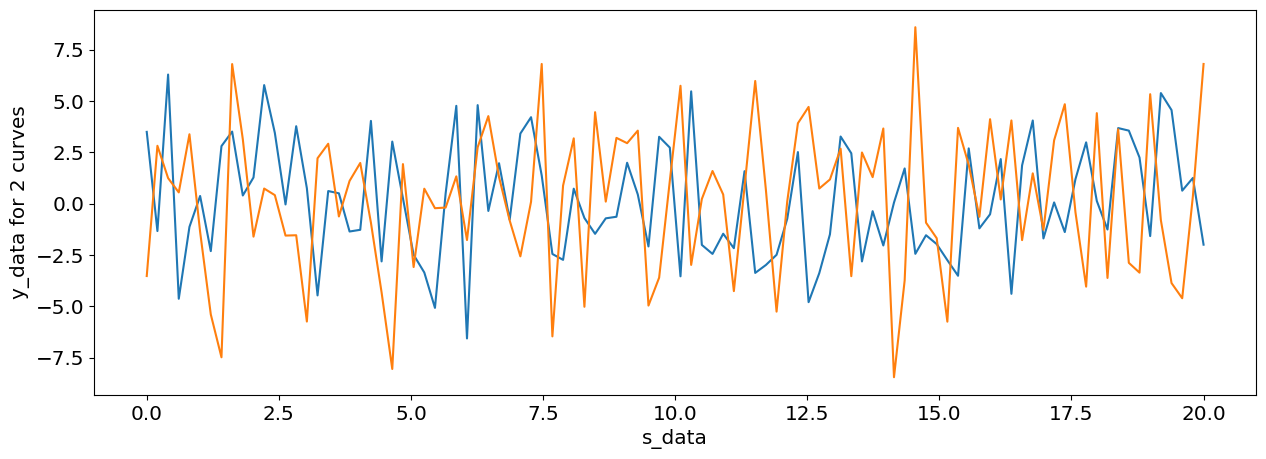

In [5]:
# simple plot
s_data = np.array(np.linspace(0,20,100)) # 100 points equally spaced between 0 and 20
y_data = 3*np.random.randn(100,2) # 100x2 random points
plt.plot(s_data, y_data)
plt.xlabel('s_data')
plt.ylabel('y_data for 2 curves')

#### Something more fancy:
One can profit of seaborn (`import seaborn as sns`) for more complex/nicer plots.

/Users/dgamba/miniforge3/envs/cas_2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dgamba/miniforge3/envs/cas_2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dgamba/miniforge3/envs/cas_2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dgamba/miniforge3/envs/cas_2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remov

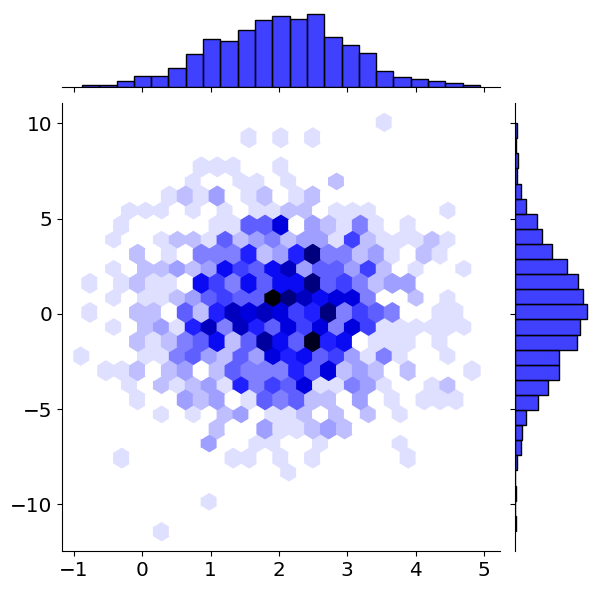

In [6]:
# something more fancy
x_data = np.random.randn(1000)+2
y_data = 3*np.random.randn(1000)
sns.jointplot(x=x_data, y=y_data, kind="hex", color="b")

#### Something even more fancy: animations (optional)

one can profit of the "interactive" package (`from ipywidgets import interactive`)
for creating user-friendly interactive plots, e.g. while varying a parameter

In [7]:
# define x array
data_x = np.linspace(-1,1,100)

# define the function to be executed at each change of some input parameter
def plotIt(a, b, c):
    data_y = a*(data_x)**3 + b*(data_x)**2 + c*(data_x)
    plt.plot(data_x, data_y, 'o-b', lw=3)
    plt.xlim([-1,1])
    plt.ylim([-1,1])

# create interactive plot, and display it
interactive_plot = interactive(plotIt,a=(-1,1,.1),b=(-2,2,.1),c=(-3,3,.1),continuous_update=True)
aux = interactive_plot.children[-1]
aux.layout.height = '350px'
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0), FloatSlider(value=0.0, descr…

## The physics basis

From [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/), you learnt about **matrices** and particle trajectories:

<p align="center">
<img src=./_img_exercises/upload_0c59b4d203ab8bd7b31827ad332baca1.png width="60%">
</p>

Those matrices are the **building blocks** for our  course. Please, keep them in mind.

#### Note about variables

- In this course, we will concentrate mainly on the **horizontal** (or vertical) dynamics. 
- The motion of **charged particles** with respect to the "center" of a beamline resamples the motion of **optical rays** in optical systems.
- If we were to be more formal, charged particles are best described by **Hamiltonian dynamics** using **canonical coordinates**. 
    - Typical **canonical coordinates** are the horizontal (or vertical) position $x$, and the corresponding horizontal momentum $p_x$ divided by the reference momentum $p_0$, i.e. $PX=p_x/p_0$.
    - If we assume that particle trajectories have **small offsets and angles** (say less than a few mm and mrad) with respect to the "axis" of long (say a few m-long) beamline under study, then:
    \begin{equation}
       PX = \frac{p_x}{p_0} \approx \frac{p_x}{p_s} = \tan(x') \approx x'
    \end{equation}
    where $p_s$ is the projected momentum along the beamline direction (i.e. coordinate $s$), and $x'$ is the angle of the particle with respect to the $s$.
    - Therefore, we assume here that using $(x, x')$ as **position-angle phase-space coordinates** is a **valid approximation**.

#### Note about units

- We will use units derived from the "Système International" (SI), e.g. lengths in metres and angles in radians. 
- However, our approximation is valid assuming small transverse positions and angles!
    - From [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/) the dynamics we are studying is linear:

        \begin{equation}
        \vec{x_s} = M \cdot \vec{x_0}
        \end{equation}
        
    - So we can multiply by $1000$ on both side and obtain:
    
        \begin{equation}
        \vec{x_s} (\text{in mm,mrad}) = 1000 \cdot \vec{x_s} (\text{in m,rad}) = 1000 \cdot M \cdot \vec{x_0} (\text{in m,rad}) =  M \cdot (1000 \cdot \vec{x_0} (\text{in m,rad})) = M \cdot \vec{x_0} (\text{in mm,mrad})
        \end{equation}
    
- We will therefore assume that **all matrices** will have units in **(m, rad)**, while all **particle coordinates** in **(mm, mrad)**.



---

# Let's start with guided exercises
## Model and tracking of a single particle


---

### Exercise 1 (guided)
A `drift` is represented by a matrix with ones on the diagonal and the length of the drift on the upper right corner:

\begin{equation}
D=\left[
\begin{array}{c}
1\quad L\\
0\quad 1
\end{array}
\right],
\end{equation}

Show, numerically, that matrix-multiplying two such matrices, one with $L_1 = 0.5$ m and the other with $L_2 = 0.2$ m in the upper right corner, produces a matrix with the sum of the distances in the upper right corner (i.e. $L_1+L_2 = 0.7$ m).

#### SOLUTION
Even if we can prove it by hand, we take the opportunity to start learning how to use Numpy arrays in Python...

In [8]:
# Let's set our lengths
L_1 = 0.5
L_2 = 0.2

# we define the matrices (Numpy arrays)
# NOTA BENE: when defining a numpy 2D array (i.e. a matrix) 
#            the innermost-array represent a row of our matrix
DRIFT_1 = np.array([[1, L_1], [0, 1]])
DRIFT_2 = np.array([[1, L_2], [0, 1]])

# let's see our matrices:
print(f'DRIFT 1:\n {DRIFT_1}')
print(f'DRIFT 2:\n {DRIFT_2}')

DRIFT 1:
 [[1.  0.5]
 [0.  1. ]]
DRIFT 2:
 [[1.  0.2]
 [0.  1. ]]


In [9]:
print(f'DRIFT 1+2:\n {DRIFT_1*DRIFT_2}')

DRIFT 1+2:
 [[1.  0.1]
 [0.  1. ]]


**QUESTION: what did we expect? is the solution provided by numpy correct?**

In [10]:
(DRIFT_1*DRIFT_2)[0,1] == L_1 + L_2

False

**BE CAREFUL!** the `*` operator produces **"element-by-element" multiplication**, but here we are looking for a **"matrix multiplication"** operation.
The **`@` operator** is the "multiplication between matrices", introduced in python 3, which you should be using instead.

In [11]:
# => the @ operator is the "multiplication between matrices"
print(f'(correct) DRIFT 1+2:\n {DRIFT_1@DRIFT_2}')
(DRIFT_1@DRIFT_2)[0,1] == L_1 + L_2

(correct) DRIFT 1+2:
 [[1.  0.7]
 [0.  1. ]]


True

**QUESTION: what is the difference between `DRIFT_2 @ DRIFT_1` and `DRIFT_1 @ DRIFT_2`? Is this important?**


Remember that the *final* coordinates of a particle, $\vec{x_s}$, are given as:

\begin{equation}
\vec{x_s} = M_n \cdot ... \cdot M_2 \cdot M_1 \cdot \vec{x_0}
\end{equation}

where $\vec{x_0}$ are the initial coordinates, $M_1$ is the first element/matrix encountered by the particle, followed by $M_2$ ... $M_n$...

**NEXT: let's repeat the exercise this time for two quadrupoles with different focal length ($f_1$ and $f_2$)**

In [12]:
# additional questions: what if we consider quadrupoles?
f1 = 1
f2 = 2

# we define the matrices
Q_1 = np.array([[1, 0], [-1/f1, 1]])
Q_2 = np.array([[1, 0], [-1/f2, 1]])

# we multiply the matrices. 
# NOTA BENE: the @ operator is the "multiplication between matrix"
Q_2 @ Q_1

array([[ 1. ,  0. ],
       [-1.5,  1. ]])

### Exercise 2 (guided)

A single particle is described by a column vector containing its phase-space coordinates ($x$, $x'$):
\begin{equation}
\vec{x} = X = \left(
\begin{array}{c}
x \\
x'
\end{array}
\right).
\end{equation}

Describe a ray, or particle, that is on the optical axis with an angle $x' = 0.5$ mrad. 
Then, transport this particle to the end of a 2 m long drift using the matrix formalism. 

#### SOLUTION

Using numpy arrays, a column vector is represented by a 2D array with 2 rows and 1 column. 

If the particle is on the optical axis, then $x$ must be zero, while $x'$ is the given initial angle 

In [13]:
# in Python
x = 0 # initial position
xp = 0.5 # initial angle
X_0 = np.array([[x], [xp]])
print(f'Initial particle coordinates:\n {X_0}')

Initial particle coordinates:
 [[0. ]
 [0.5]]


In [14]:
# we build the drift as we did earlier on:
L = 2
DRIFT = np.array([[1, L], [0, 1]])

# and transport the initial particle to the end of the drift:
X_1 = DRIFT @ X_0
print(f'Final particle coordinates:\n {X_1}')

Final particle coordinates:
 [[1. ]
 [0.5]]


**Note:** Going through a drift of length $L$, the angle of the particle is not affected $x'_1 = x'_0$, while the final position is increased by $x_1 = x_0 + L * x'_0$

### Exercise 3

As for the drift, implement a focusing quadrupole matrix (using the thin lens approximation) with focal length $f = 2$.

Build the transfer matrix of a beam line made of such a quadrupole followed by a drift of length $L = f = 2$.

Transport one particle that starts with an initial offset (e.g. x_0 = 0.4 mm) through such a system: 
- What is the final position (x_1)?
- Try to vary the initial offset: what do you see?

**Hint 1**: recall from [Wolfgan's lecture](https://indico.cern.ch/event/1117526/contributions/4978192/):

<p align="center">
<img src=./_img_exercises/upload_938d56be287cccab0bd618456f94efc1.png width="60%">
</p>

**Hint 2**: think a little extra about ordering of the matrices.

In [15]:
# Let's define a quadrupole with focal length f1, as in Ex. 1
f = 2
QUAD = np.array([[1, 0], [-1/f, 1]])

# Let's define a drift of length L=f, as in Ex. 1
L = f
DRIFT = np.array([[1, L], [0, 1]])

# And our initial vector (parallel ray), as in Ex. 2
x = 0.4 # initial position
xp = 0 # initial angle
X_0 = np.array([[x], [xp]])

# And we propagate, as in Ex. 2
X_1 = DRIFT @ QUAD @ X_0
print(f'Final particle coordinates:\n {X_1}')
print(f'Final particle x:\n {X_1[0,0]} mm')


Final particle coordinates:
 [[ 0. ]
 [-0.2]]
Final particle x:
 0.0 mm


**NOTE: The particle arrives on the beam axis! We have built an imaging system!**

### Exercise 4

The phase-space coordinates of several, say $N$, particles can be conveniently collected in a $2 \times N$ matrix:
\begin{equation}
X = \left[ 
    \left(
    \begin{array}{c}
    x \\
    x'
    \end{array}
    \right)_1
    \left(
    \begin{array}{c}
    x \\
    x'
    \end{array}
    \right)_2
    \left(
    \begin{array}{c}
    x \\
    x'
    \end{array}
    \right)_3
    \cdots
    \left(
    \begin{array}{c}
    x \\
    x'
    \end{array}
    \right)_N
\right]
\end{equation}

This is very convenient, as we can then transport all particles through the very same matrix multiplication: 
\begin{equation}
X_1 = M \cdot X_0
\end{equation}
where $X_0$ are the initial coordinates, and $X_1$ the final ones. 

Using this formalism, describe $N=5$ particles all with initial angle $x'_0=0$, but different initial $x_0$, e.g. [-2,-1,0,1,2] mm.

Then, track all particles along the imaging system of the previous exercise, and once more prove that all particles cross the beam axis, eventually using a simple plot.

What happens if you modify your beam line such that $f \ne L$?


In [16]:
# Same as previous exercise, create the necessary transport matrices:
f = 2
QUAD = np.array([[1, 0], [-1/f, 1]])
L = f
DRIFT = np.array([[1, L], [0, 1]])

In [17]:
# Let's define all initial conditions in a matrix:
X_0 = np.array([[-2,-1,0,1,2], [0,0,0,0,0]])

In [18]:
# Finally, we propagate our coordinates along our system
X_1 = DRIFT @ QUAD @ X_0
print(f'Final particle coordinates:\n {X_1}')
print(f'Final particle xs:\n {X_1[0,:]} mm')

Final particle coordinates:
 [[ 0.   0.   0.   0.   0. ]
 [ 1.   0.5  0.  -0.5 -1. ]]
Final particle xs:
 [0. 0. 0. 0. 0.] mm


Text(0, 0.5, 'Final x_1 [mm]')

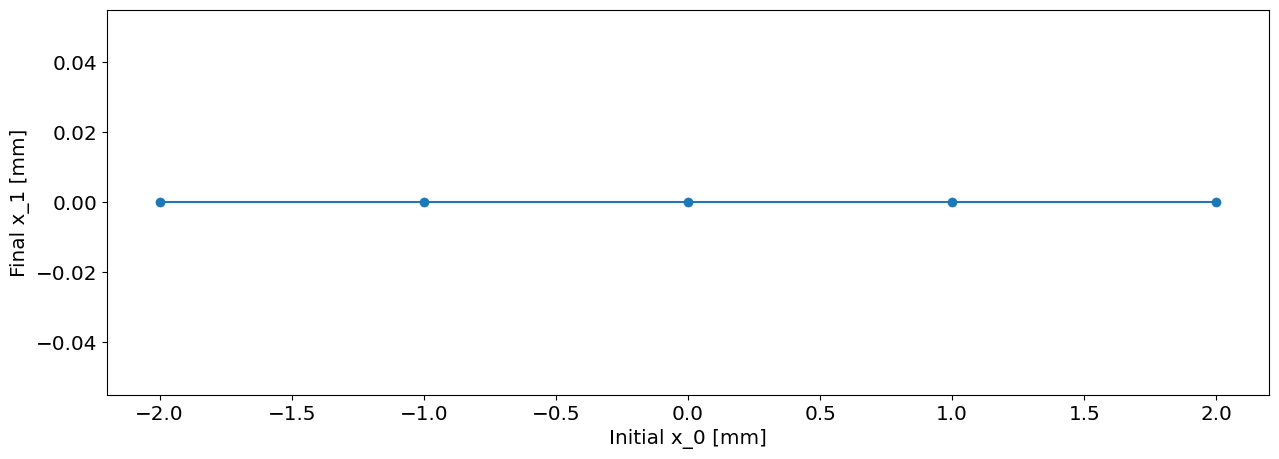

In [19]:
# We can plot, for example, the final x as a function of the initial one for each particle:
plt.plot(X_0[0,:], X_1[0,:], 'o-')
plt.xlabel('Initial x_0 [mm]')
plt.ylabel('Final x_1 [mm]')

We see that no matter the inital offset, the particle is always on the beam axis. **This is the meaning of the focal length!** 

What happens if we go away from the $f=L$ condition?

Text(0, 0.5, 'Final x_1 [mm]')

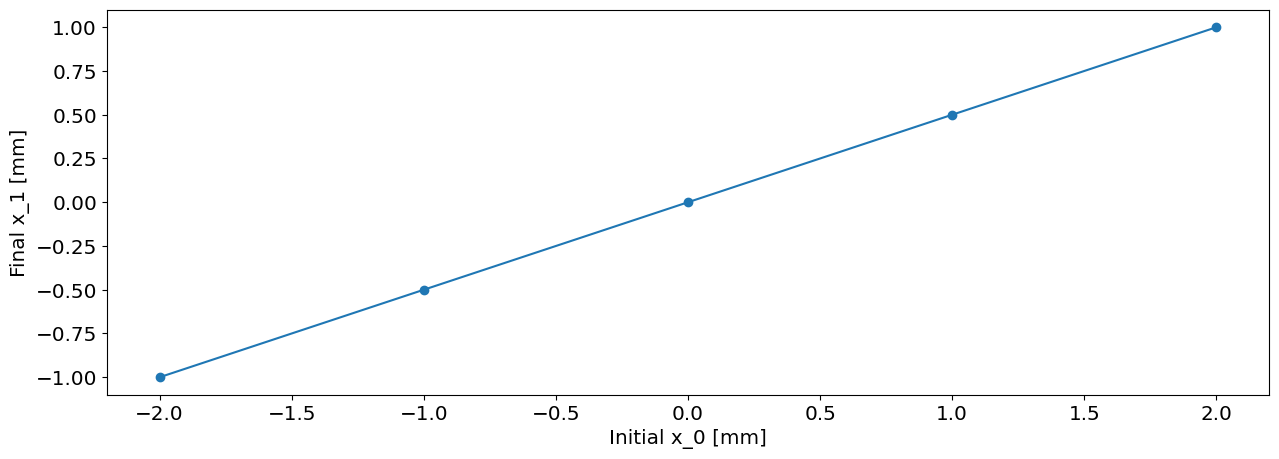

In [20]:
# Let's build a new system:
f = 2
QUAD = np.array([[1, 0], [-1/f, 1]])
L = 1
DRIFT = np.array([[1, L], [0, 1]])
# let's use the same initial coordinates:
X_0 = np.array([[-2,-1,0,1,2], [0,0,0,0,0]])
# track and plot:
X_1 = DRIFT @ QUAD @ X_0
plt.plot(X_0[0,:], X_1[0,:], 'o-')
plt.xlabel('Initial x_0 [mm]')
plt.ylabel('Final x_1 [mm]')

**Clearly, the final x coordinate is not zero anymore (except for the particle with $x_0 = 0$)...**

**... however, the behavior of the system remains linear!**

---

# Interlude: a small tracking library

---


## Some more convenient functions to model an accelerator

We are going to define some important functions, very useful for the rest of the exercises.

### Modeling of a drift

Let's start with a function that generate a convenient representation of a **drift**. 

In [21]:
def D(L):
    '''Returns a list containing a single "drift" of length L'''
    # NB: we return a list with a dict
    # the dict contains the matrix (the transformation)
    # and the element length 
    return [{'matrix':np.array([[1, L],[0, 1]]), 'length':L}] 

# A drift of L=2 m can be generated as:
D(2)

[{'matrix': array([[1, 2],
         [0, 1]]),
  'length': 2}]

The main reason for returning such a `list` with inside a `dictionary` are:

- it will allow us to keep track of the path travelled by the particle (thanks to the `length` dictionary key)
- the element is embedded in a list so to allow for an easy concatenation of elements (e.g. D(1.2) + D(4.3) will produce a list with two elements: one representing a drift of L=1.2 and one of L=4.3 m).

In [22]:
# e.g. representation of a beamline made of two drifts of different length:
D(1) + D(2)

[{'matrix': array([[1, 1],
         [0, 1]]),
  'length': 1},
 {'matrix': array([[1, 2],
         [0, 1]]),
  'length': 2}]

> **Note:** this is just **one of many possible implementation** choices.
> One could think of different structures and ways to model a beamline.
> The scope of this course is not to give you a high-efficency and optimised tracking code, 
> but to **help you to understand** the basics of the underlying **accelerator physics**.

### Modeling of a quadrupole

In [23]:
def Q(f):
    '''Returns a list containing a quadrupole with focal length f'''
    # NB: we return a list with a dict
    # the dict contains the matrix (the transformation)
    # and the element length 
    return [{'matrix':np.array([[1, 0],[-1/f, 1]]), 'length':0}]

# e.g. representation of a beamline made of one drift followed by one quadrupole:
D(1) + Q(2)

[{'matrix': array([[1, 1],
         [0, 1]]),
  'length': 1},
 {'matrix': array([[ 1. ,  0. ],
         [-0.5,  1. ]]),
  'length': 0}]

### From a list of elements - or beamline - to an equivalent single element

A beam line (or a whole ring) is modelled by a series of matrices. Independently of the initial particle coordinates, we can compute a single matrix ($M_{eq.}$) that represents the whole beam line (or ring): 

\begin{equation}
X_s = M_n \cdot ... \cdot M_2 \cdot M_1 \cdot X_0 = M_{eq.} \cdot X_0
\end{equation}

Given our choice of beamline strcuture, i.e. a `list` of **elements**, each modeled by a `dictionary` with some properties, we can define a useful function to compute the *equivalent* matrix $M_{eq.}$ (actually an *equivalent* **element** represented by a `dictionary` inside a `list`) of a whole beamline made of several **elements**:

In [24]:
def getEquivalentElement(beamline):
    '''Returns the single element which is equivalent of the given beamline'''
    # we start from an identity matrix (np.eye)
    # with the same dimension of the matrix of the
    # first element of the beamline
    equivalentElement = np.eye(beamline[0]['matrix'].shape[0])
    length = 0
    # NB: we reverse the order of the beamline ([-1::-1])
    for elements in beamline[-1::-1]:
        # we multiply the matrices 
        equivalentElement = equivalentElement @ elements['matrix']
        # and we add the lengths
        length = length + elements['length']
    # we return the dict with the "usual" keys (matrix and length) embedded in a
    #  list (with a single element), as for the definition of the D and Q functions
    return [{'matrix':equivalentElement, 'length':length}]

# e.g. equivalent representation of a beamline made of two drifts of different length:
getEquivalentElement(D(1) + D(2))

[{'matrix': array([[1., 3.],
         [0., 1.]]),
  'length': 3}]

### Tracking particles along a beamline

We can also write a function that "tracks" one, or several particles defined by their initial coordinate, along a beamline. 
The `transportParticles` function will create a list of particle coordinates for each location along the beam line, as well as a list of s positions.

In [25]:
def transportParticles(X_0, beamline, s_0=0):
    '''Track the particle(s) `X_0` along the given `beamline`. 
    If needed, one can specify an initial longitudinal position `s_0`, otherwise set to 0.

    It will return a dictionary containing the following key:values
       'x': a NxM numpy array with the M-particles x position for all N-elements of the beamline
       'xp': a NxM numpy array with the M-particles x' angles for all N-elements of the beamline
       's': a N-long numpy array with the longitudinal position of the N-elements of the beamline
       'coords': a Nx2xM numpy array with all M-particles coordinates (both x and x') at all N-elements of the beamline
    
    Disclaimer: if beamline is made of 5 elements, the output will have 5+1 "elements" as it will also 
                return include the initial particle coordinates.
    '''
    coords = [X_0]
    s = [s_0]
    for element in beamline:
        coords.append(element['matrix'] @ coords[-1])
        s.append(s[-1] + element['length']) 
    coords = np.array(coords)
    s = np.array(s)
    return {'x':  coords[:,0,:], # [s_idx, particle_idx]
            'xp': coords[:,1,:], # [s_idx, particle_idx]
            's':  s,   # [s_idx]
            'coords': coords,}   # [s_idx, coord_idx, particle_idx]

Text(0, 0.5, 'x [mm]')

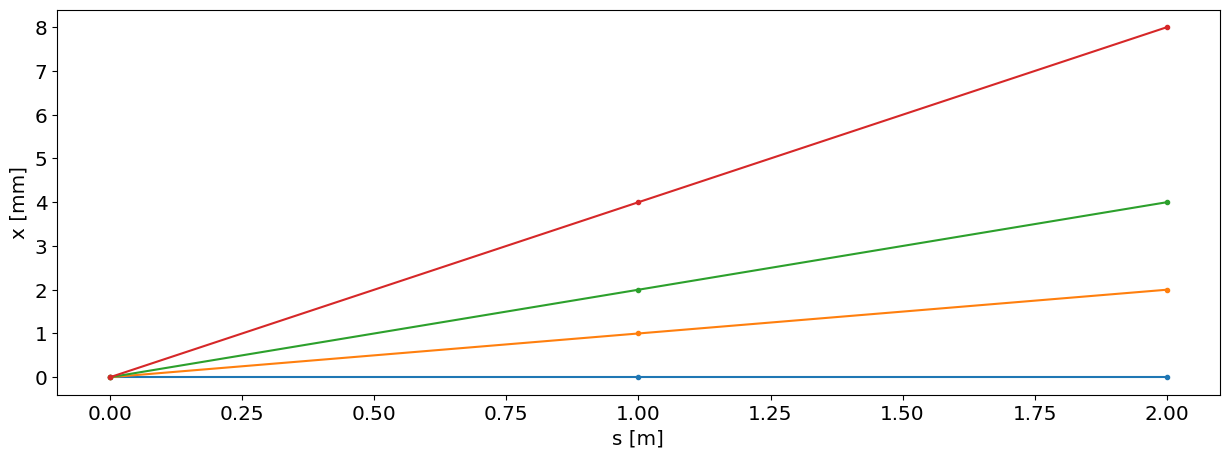

In [26]:
# e.g. define the intial coordinates for 3 particles all with
#      0 x position, but different angles:
X_0 = [[0,0,0,0],
       [0,1,2,4]]
# and let's transport them through a lattice made of 2 equally long drifts
tracked_data = transportParticles(X_0, D(1)+D(1))
# and plot the trajectories of all particles, i.e. x as a function of s:
plt.plot(tracked_data['s'], tracked_data['x'], '.-')
plt.xlabel('s [m]')
plt.ylabel('x [mm]')

### Exercise 5
Let's consider the beamline from [Exercise 4](#exercise-4), i.e. a quadrupole followed by a drift such that $f=L=2.5$, however model the drift as a series of $L/10$ long drifts.

Verify once more that parallel rays (e.g. $x_0$ = [-2,-1,0,1,2] mm) cross the axis after a distance $L=f$, but this time **using our newly developed functions**:
- Plot the final position of all particles (profiting of `getEquivalentElement`)
- Plot the trajectory of all rays/particles along the beamline (profiting of `transportParticles`).

#### SOLUTION 1 - using `getEquivalentElement` function.

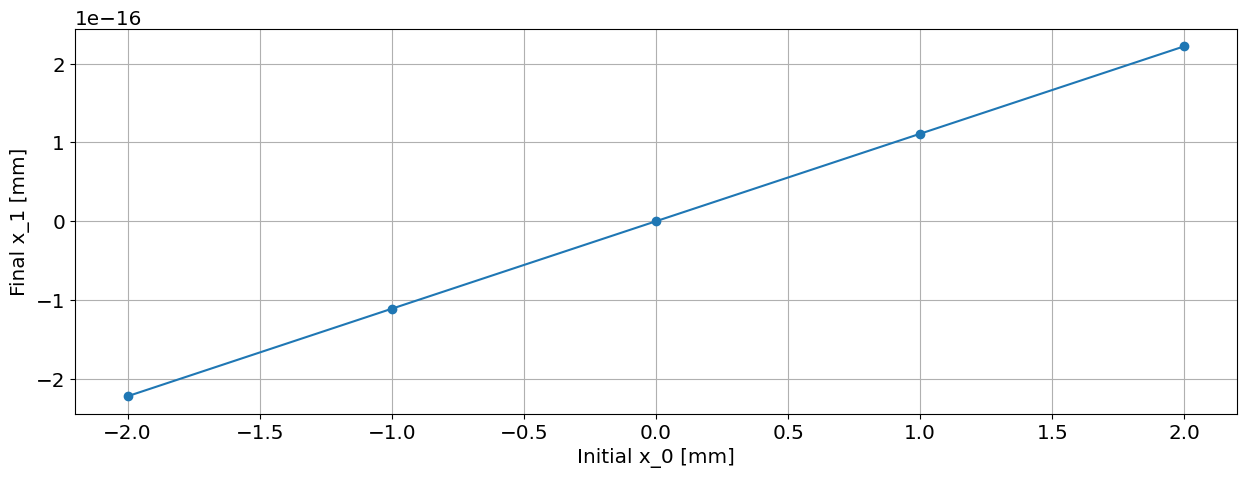

In [27]:
# Particles definition:
X_0 = np.array([[-2,-1,0,1,2], [0,0,0,0,0]])
# beamline definition:
f = 2 # [m]
beamline = Q(f) + 10 * D(f/10)
# compute equivalent element
equivalent_element = getEquivalentElement(beamline)
# extract the first(only) matrix, and multiply it by the initial particle coordinates:
X_1 = equivalent_element[0]['matrix'] @ X_0

# plotting (careful with exponents on the y-axis)
plt.plot(X_0[0,:], X_1[0,:], 'o-')
plt.xlabel('Initial x_0 [mm]')
plt.ylabel('Final x_1 [mm]')
plt.grid(True)

... almost zero for all initial condition, as expected.

#### SOLUTION 2 - using `transportParticles` function.

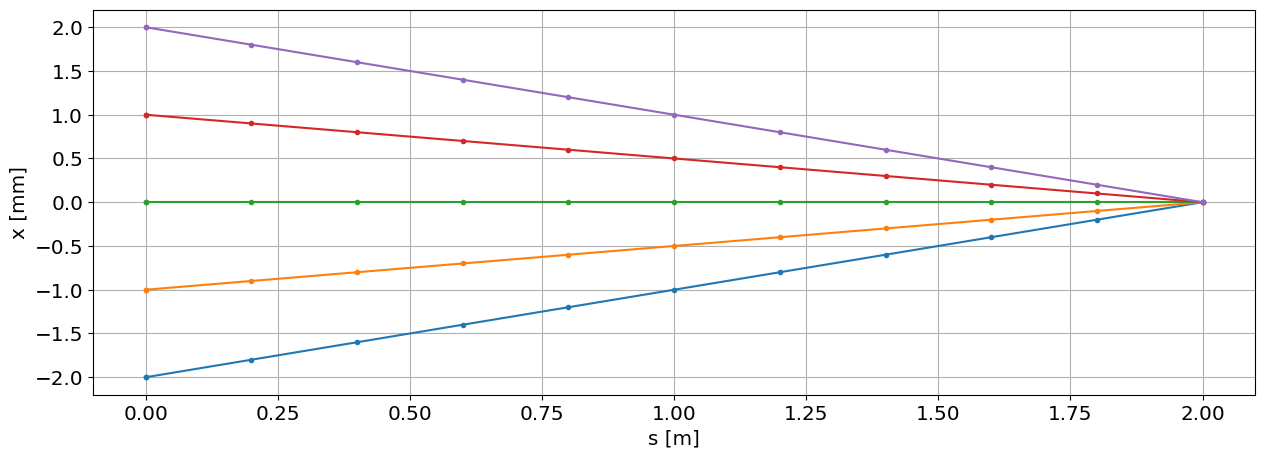

In [28]:
# we the transportParticles function we can se the particle along the line
# this can help to visualize the concept of focal length
transported_particles = transportParticles(X_0, beamline)
plt.plot(transported_particles['s'], transported_particles['x'],'.-')
plt.xlabel('s [m]')
plt.ylabel('x [mm]')
plt.grid(True)

Indeed we found back the expected results... 
... but let's look in some more details also here:

In [29]:
# Print the `x` coordinate at the last (-1) element of the beamline for all particles (:)
print(transported_particles['x'][-1,:])

[-2.77555756e-16 -1.38777878e-16  0.00000000e+00  1.38777878e-16
  2.77555756e-16]


**One has to be careful with numerical precision! See the [Computational Tools](https://indico.cern.ch/event/1226773/contributions/5161277/) lectures!!**

---

# Now is your turn!

Continue by yourself with the exercises of the following notebooks:

- [02_Single_Particle_Beamline](./02_Single_Particle_Beamline.ipynb)
- [03_Multi_Particles_Beamline](./03_Multi_Particles_Beamline.ipynb)
- [04_Periodic_Systems](./04_Periodic_Systems.ipynb)
- [05_Advanced_Exercises](./05_Advanced_Exercises.ipynb)

The library of functions introduced in this and the next notebooks are all gathered in the [tracking_library.py](./tracking_library.py) file, which can imported in any notebook as:

```
from tracking_library import *
```

The notebooks above are meant to be the pre-setup canvas where you can directly solve the problems.